# Eksplorasi dan Persiapan Data

## Inisiasi Data dan Library

IMPOR Library YANG DIPERLUKAN
- penggunaan numpy dalam mengelola data array numpy
- penggunaan matplotlib dalam menunjukkan plot data
- panda digunakan dalam mengelola set data
- penggunaan laut dalam menunjukkan korelasi dari setiap fitur ke fitur lain
- penggunaan praprosesi dengan tujuan untuk menggunakan StandardScaler() dan LabelEncoder()
- penggunaan matematika dalam perhitungan jarak eukskliman
- Penggunaan PCA dalam tujuan untuk pengurangan dimentional dalam hal visualisasi data

In [1]:
#library yang akan digunakan
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import math

In [2]:
#inisiasi data dari file csv
dataset = pd.read_csv("kendaraan_train.csv")

## Eksplorasi Data

In [3]:
#sample lima data teratas
dataset.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [4]:
#nilai statistik dari masing-masing kolom seperti rata-rata, nilai min, nilai max, dan lain-lain
dataset.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
#Melihat jumlah data dan type data pada masing-masing kolom
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 22.9+ MB


## Pembersihan Data

In [6]:
#mendeteksi nilai null/Nan pada tiap kolom
missing_data = dataset.isnull()
missing_data.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False


In [7]:
#menunjukkan jumlah data yang kosong pada tiap kolom
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

id
False    285831
Name: id, dtype: int64

Jenis_Kelamin
False    271391
True      14440
Name: Jenis_Kelamin, dtype: int64

Umur
False    271617
True      14214
Name: Umur, dtype: int64

SIM
False    271427
True      14404
Name: SIM, dtype: int64

Kode_Daerah
False    271525
True      14306
Name: Kode_Daerah, dtype: int64

Sudah_Asuransi
False    271602
True      14229
Name: Sudah_Asuransi, dtype: int64

Umur_Kendaraan
False    271556
True      14275
Name: Umur_Kendaraan, dtype: int64

Kendaraan_Rusak
False    271643
True      14188
Name: Kendaraan_Rusak, dtype: int64

Premi
False    271262
True      14569
Name: Premi, dtype: int64

Kanal_Penjualan
False    271532
True      14299
Name: Kanal_Penjualan, dtype: int64

Lama_Berlangganan
False    271839
True      13992
Name: Lama_Berlangganan, dtype: int64

Tertarik
False    285831
Name: Tertarik, dtype: int64



In [8]:
dataset['id'].unique()
dataset.drop(columns=['id'], inplace=True)

In [9]:
df = dataset
# label_encoder type data objek mengubah ke nilai integer .
label_encoder = preprocessing.LabelEncoder()

df = df[df['Jenis_Kelamin'].notna()]
df = df[df['Umur_Kendaraan'].notna()]
df = df[df['Kendaraan_Rusak'].notna()]

# Encode label di kolom
df['Jenis_Kelamin']= label_encoder.fit_transform(df['Jenis_Kelamin'])
df['Umur_Kendaraan']= label_encoder.fit_transform(df['Umur_Kendaraan'])
df['Kendaraan_Rusak']= label_encoder.fit_transform(df['Kendaraan_Rusak'])

print(df['Jenis_Kelamin'].unique())
print(df['Umur_Kendaraan'].unique())
print(df['Kendaraan_Rusak'].unique())

[1 0]
[1 2 0]
[1 0]


In [10]:
df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,33.0,1.0,1,1,28029.0,152.0,97.0,0
1,0,48.0,1.0,39.0,0.0,2,0,25800.0,29.0,158.0,0
3,1,58.0,1.0,48.0,0.0,0,1,2630.0,124.0,63.0,0
5,0,21.0,1.0,35.0,1.0,1,1,22735.0,152.0,171.0,0
7,0,23.0,NaN,28.0,1.0,1,1,26869.0,152.0,222.0,0


In [11]:
core = df.corr(method='pearson')
core

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
Jenis_Kelamin,1.000000,-0.145818,0.016776,-0.001425,0.081093,0.115419,0.091469,-0.002715,0.114552,0.001852,-0.052945
Umur,-0.145818,1.000000,-0.080675,0.043641,-0.255208,-0.523315,-0.268108,0.065094,-0.576918,-0.000703,0.109180
SIM,0.016776,-0.080675,1.000000,-0.004649,0.016800,0.032134,0.018396,-0.012567,0.044062,-0.000616,0.009696
Kode_Daerah,-0.001425,0.043641,-0.004649,1.000000,-0.024171,-0.028024,-0.028022,-0.011452,-0.043691,-0.004673,0.010753
Sudah_Asuransi,0.081093,-0.255208,0.016800,-0.024171,1.000000,0.174256,0.824898,0.005361,0.220145,0.003104,-0.341010
Umur_Kendaraan,0.115419,-0.523315,0.032134,-0.028024,0.174256,1.000000,0.174108,0.023467,0.391489,0.001803,-0.103215
Kendaraan_Rusak,0.091469,-0.268108,0.018396,-0.028022,0.824898,0.174108,1.000000,-0.008349,0.224362,0.001182,-0.354806
Premi,-0.002715,0.065094,-0.012567,-0.011452,0.005361,0.023467,-0.008349,1.000000,-0.112732,-0.001212,0.024353
Kanal_Penjualan,0.114552,-0.576918,0.044062,-0.043691,0.220145,0.391489,0.224362,-0.112732,1.000000,0.000190,-0.140748
Lama_Berlangganan,0.001852,-0.000703,-0.000616,-0.004673,0.003104,0.001803,0.001182,-0.001212,0.000190,1.000000,0.000115


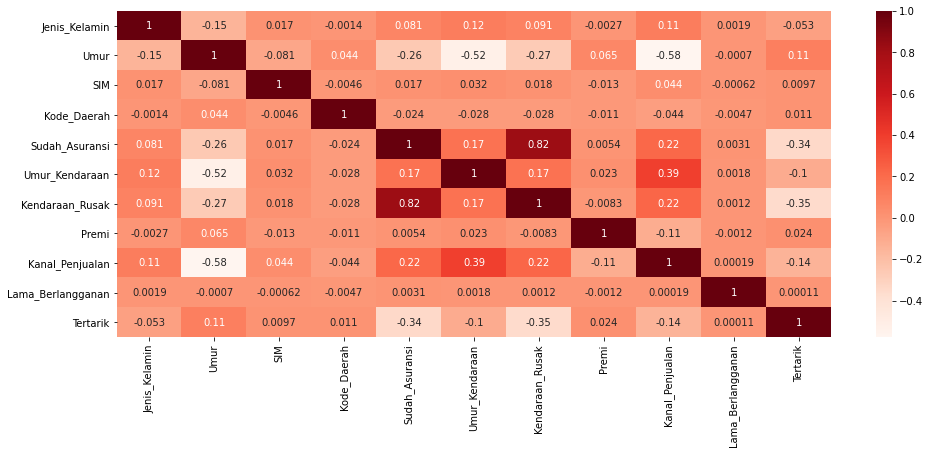

In [12]:
#menghitung hubungan antar kolom dan ditampilkan melalui heatmap
plt.figure(figsize=(16, 6))
# cor = data_eksperimen.corr()
sns.heatmap(core, annot=True, cmap=plt.cm.Reds)
plt.show()

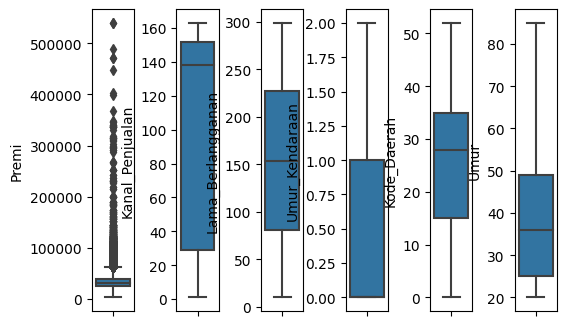

In [13]:
# plot outliers using box plot
plt.rcParams['figure.dpi'] = 100
f, axes = plt.subplots(1, 6)
sns.boxplot(y=df["Premi"], ax=axes[0])
sns.boxplot(y=df["Kanal_Penjualan"], ax=axes[1])
sns.boxplot(y=df["Lama_Berlangganan"], ax=axes[2])
sns.boxplot(y=df["Umur_Kendaraan"], ax=axes[3])
sns.boxplot(y=df["Kode_Daerah"], ax=axes[4])
sns.boxplot(y=df["Umur"], ax=axes[5])
plt.subplots_adjust(wspace=1)

In [14]:
df.loc[df['Premi'] > 100000]

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
58,1,59.0,NaN,41.0,1.0,0,1,103372.0,152.0,232.0,0
1600,1,25.0,1.0,28.0,1.0,1,1,113350.0,152.0,103.0,0
3591,0,28.0,1.0,28.0,1.0,1,1,100171.0,152.0,124.0,0
4011,0,54.0,1.0,41.0,0.0,0,1,109965.0,26.0,44.0,0
4833,0,24.0,1.0,45.0,1.0,1,1,102789.0,151.0,152.0,0
...,...,...,...,...,...,...,...,...,...,...,...
283020,0,80.0,1.0,28.0,0.0,0,0,101205.0,124.0,NaN,0
283205,0,29.0,NaN,28.0,1.0,1,1,123446.0,152.0,76.0,0
283887,0,56.0,1.0,28.0,0.0,0,0,104643.0,26.0,NaN,0
285120,0,22.0,1.0,35.0,1.0,1,1,112115.0,152.0,36.0,0


In [15]:
outliers = df.loc[(df['Premi']>=100000)]
df = df.drop(outliers.index)
df.loc[df['Premi'] >= 100000]

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244542 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      244542 non-null  int32  
 1   Umur               232388 non-null  float64
 2   SIM                232221 non-null  float64
 3   Kode_Daerah        232345 non-null  float64
 4   Sudah_Asuransi     232324 non-null  float64
 5   Umur_Kendaraan     244542 non-null  int32  
 6   Kendaraan_Rusak    244542 non-null  int32  
 7   Premi              232115 non-null  float64
 8   Kanal_Penjualan    232273 non-null  float64
 9   Lama_Berlangganan  232584 non-null  float64
 10  Tertarik           244542 non-null  int64  
dtypes: float64(7), int32(3), int64(1)
memory usage: 19.6 MB


In [17]:
df = df
df_filter = df.select_dtypes(include=['float64'])

#ganti NaN ke rata-rata (hanya tipe float64) kecuali Kode_Daerah
for column in df_filter.columns.values.tolist():
    if column != 'Kode_Daerah':
        avg = round(df[column].astype("float").mean(axis=0))
        print(column)
        print(avg)
        df[column].replace(np.nan, avg, inplace=True)

#Kode_Daerah dengan nilai NaN akan dihapus
df = df[df['Kode_Daerah'].notna()]

Umur
39
SIM
1
Sudah_Asuransi
0
Premi
30311
Kanal_Penjualan
112
Lama_Berlangganan
154


In [18]:
#pemilihan data pada kolom/fitur yang akan digunakan nantinya
data_train = df.copy()

data_train = data_train[['Umur','Kanal_Penjualan']]
data_train.head()

,Umur,Kanal_Penjualan
0,30.0,152.0
1,48.0,29.0
3,58.0,124.0
5,21.0,152.0
7,23.0,152.0


In [19]:
#mengecek nilai kosong pada data yang akan digunakan
missing_data = data_train.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")


Umur
False    232345
Name: Umur, dtype: int64

Kanal_Penjualan
False    232345
Name: Kanal_Penjualan, dtype: int64



## Persiapan Data

Pada tahap ini digunakan untuk mengubah bentuk dari data yang akan digunakan ke dalam bentuk array dua dimensi. Hal tersebut dilakukan agar mempermudah pengelolaan datanya.

In [20]:
data = data_train.values
data
# Standarisasi data untuk memiliki rata-rata ~ 0 dan varians 1
sc_data = StandardScaler()
data = sc_data.fit_transform(data_train)
data

array([[-0.58303545,  0.75451563],
       [ 0.60603667, -1.57663104],
       [ 1.2666323 ,  0.2238481 ],
       ...,
       [-1.04545239,  0.75451563],
       [ 1.92722792,  0.2238481 ],
       [ 0.40785798, -1.63348827]])

## Scatter Plot Data

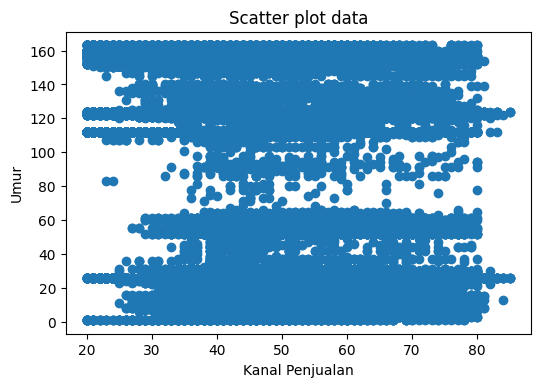

In [21]:
# memasukkan data ke dalam variabel
x = data_train.iloc[:, 0].values
y = data_train.iloc[:, 1].values

# menggunakan scatter plot untuk menggambarkan data
plt.scatter(x, y)
plt.title('Scatter plot data')
plt.ylabel('Umur')
plt.xlabel('Kanal Penjualan')
plt.show()

# Pemodelan

## Perhitungan Jarak Data

Fungsi calculate_distance ini digunakan untuk menghitung jarak antara suatu data dengan sebuah sentroid. Fungsi ini mengembalikan absolute nilai dari selesih data dengan sentroid.

In [22]:
def calculate_distance(d, cen):
    total = []
    for i in range(len(d)):
        total.append((d[i]-cen[i])**2)

    return math.sqrt(np.sum(total))

## Rata-rata Cluster

Fungsi avg_cluster ini digunakan untuk menghitung rata-rata dari sebuah cluster. Parameter fungsi ini adalah klaster yang akan dicari rata-ratanya dengan jumlah kolom/fitur yang digunakan.

In [23]:
def avg_cluster(clus, col):
    array_temp = []
    global clusters
    global centroids
    #menginisiasi nilai array dengan 0
    for i in range(col):
        array_temp.append(0)

    #mengisi nilai array dengan jumlah nilai pada klaster sesuai kolom
    for i in range(len(clus)):
        for j in range(col):
            array_temp[j] = array_temp[j] + clus[i][j]

    #membagi nilai array dengan total data pada klaster
    for i in range(col):
        array_temp[i] = array_temp[i]/len(clus)

    return array_temp

## Class K-Means Clustering

Class k_means ini adalah yang akan mengklasterisasi data yang diberikan ke dalam sejumlah klaster yang ditentukan. yang berarti data yang akan diklaster dan k yang berarti banyak klaster yang diinginkan. Output dari fungsi ini adalah klaster yang dihasilkan beserta sentroidnya.
ada Evaluasi metode evaluasi klaster yang digunakan adalah Sum Square Error (SSE)Fungsi sse_evaluation ini digunakan untuk mengevaluasi SSE data untuk sejumlah klaster yang ditentukan. Data berada parameter Ddan jumlah klaster didapat dari parameter K_eval. Outputnya adalah array SSE untuk tiap klaster.dan digunakan untuk menghitung jumlah kuadrat dari selisih data pada klaster dengan sentroidnya. cen untuk sentroid, clu untuk klaster yang ingin dievaluasi,dan col untuk jumlah kolom/fitur yang digunakan.


In [24]:
class KMeans():
    #pembuatan object yang pertama kali
    def __init__(self,K=6):
        self.K = K
        # daftar indeks sampel untuk setiap kluster
        self.clusters = {}
        # pusat (vektor fitur rata-rata) untuk setiap kluster
        self.centroids = []

    def predict(self,D):
        
        self.clusters = {}
        jml_baris = D.shape[0]
        jml_kolom = D.shape[1]

        #memilih centroid secara acak dari data
        self.centroids = []
        for i in range(self.K):
            rand=rd.randint(0,jml_baris-1)
            self.centroids.append(D[rand])

        #proses clustering
        while True:
            #inisiasi cluster
            for i in range(self.K):
                self.clusters[i] = []

            #memasukkan data ke cluster terdekat
            for x in D:
                euc_dist = []
                for j in range(self.K):
                    euc_dist.append(calculate_distance(x, self.centroids[j]))
                self.clusters[euc_dist.index(min(euc_dist))].append(x)

            #menghitung rata-rata cluster dan memasukkan ke centroid baru
            avg_centroid = []
            for i in range(self.K):
                avg_centroid.append(avg_cluster(self.clusters[i], jml_kolom))

            #ubah posisi centroids
            centroids_tetap = True
            for i in range(self.K):
                if (round(np.sum(self.centroids[i]),2)-round(np.sum(avg_centroid[i]),2) != 0):
                    self.centroids[i] = avg_centroid[i]
                    centroids_tetap = False

            #cek kondisi centroids
            if centroids_tetap:
                break

        return self.clusters, self.centroids
        

    def sse_evaluation(self,D, K_eval):
        jml_kolom = D.shape[1]
        SSE_array = np.array([])
        SSE = 0
        global K
        for i in range(2,K_eval+1):
            #proses clustering dari untuk range tertentu
            self.K = i
            clusters, centroids = self.predict(D)
            #proses perhitungan sum square error
            jum = 0
            for j in range(self.K):
                for l in range(len(self.clusters[j])):
                    for m in range(jml_kolom):
                        jum = jum + (np.sum(centroids[j][m]-clusters[j][l][m])**2)

            #kode print(K) digunakan untuk mengetahui sudah sejauh mana proses evaluasi
            #print(K)
            print(jum)
            SSE_array=np.append(SSE_array,jum)

        return SSE_array
    
 

## Scatter Plot Cluster

Fungsi draw_scatter_plot ini digunakan untuk membangun scatter plot dari klaster yang tersedia beserta sentroidnya.

In [25]:
def draw_scatter_plot(k):
    array_x = []
    array_y = []
    global clusters
    global centroids
    colors = ["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"]
    global K
    K = k
    for i in range(K):
        for j in range(len(clusters[i])):
            array_x.append(clusters[i][j][0])
            array_y.append(clusters[i][j][1])
        plt.scatter(array_x, array_y, color=colors[i])
        array_x = []
        array_y = []
        plt.scatter(centroids[i][0], centroids[i][1], marker='*', s=100)

## Proses Training

Pada bagian ini merupakan aplikasi dari fungsi yang sudah dibuat sebelumnya terhadap data yang diberikan.

In [26]:
global K
Ke = KMeans()
clusters,centroids = Ke.predict(data)

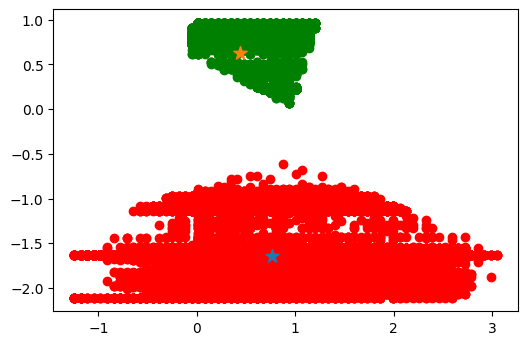

In [27]:
global centroids
global clusters 
global K
draw_scatter_plot(2)

Evaluasi

### Elbow Method

Pada bagian ini akan menggunakan class pada kmeans dengan memangggi fungsi sse_evaluation yang telah dibuat sebelumnya untuk mengevaluasi sebanyak K yang ditentukan.

In [28]:
K_evaluation = 6
global K
K = KMeans()
y_evaluation = K.sse_evaluation(data,K_evaluation)
K_array = np.arange(2, K_evaluation+1)

184187.42643886176
96210.85506247001
69569.59186352465
41366.837577531514
37145.88039445815


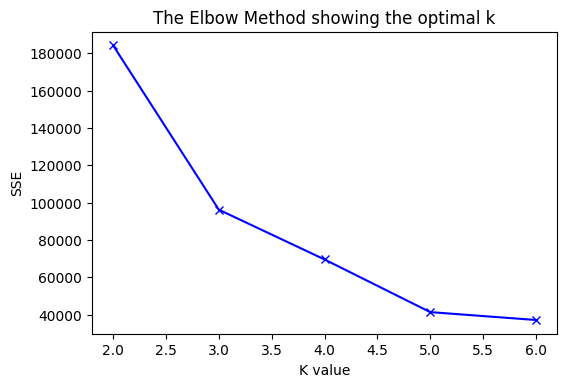

In [29]:
plt.rcParams['figure.dpi'] = 100
plt.plot(K_array,y_evaluation, 'bx-')
plt.xlabel('K value')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

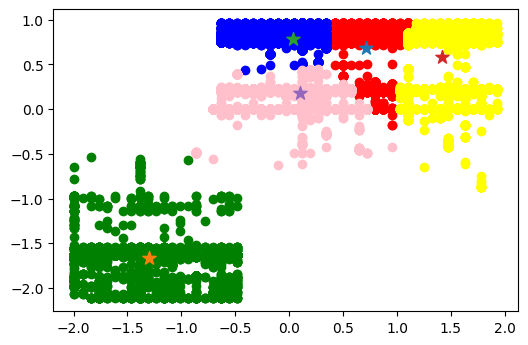

In [65]:
global centroids
global clusters 
global K
draw_scatter_plot(5)

# Eksperimen

In [31]:
#inisiasi data
data_eksperimen = df

In [32]:
#sample lima data teratas
data_eksperimen.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,33.0,1.0,1,1,28029.0,152.0,97.0,0
1,0,48.0,1.0,39.0,0.0,2,0,25800.0,29.0,158.0,0
3,1,58.0,1.0,48.0,0.0,0,1,2630.0,124.0,63.0,0
5,0,21.0,1.0,35.0,1.0,1,1,22735.0,152.0,171.0,0
7,0,23.0,1.0,28.0,1.0,1,1,26869.0,152.0,222.0,0


In [33]:
data_eksperimen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232345 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      232345 non-null  int32  
 1   Umur               232345 non-null  float64
 2   SIM                232345 non-null  float64
 3   Kode_Daerah        232345 non-null  float64
 4   Sudah_Asuransi     232345 non-null  float64
 5   Umur_Kendaraan     232345 non-null  int32  
 6   Kendaraan_Rusak    232345 non-null  int32  
 7   Premi              232345 non-null  float64
 8   Kanal_Penjualan    232345 non-null  float64
 9   Lama_Berlangganan  232345 non-null  float64
 10  Tertarik           232345 non-null  int64  
dtypes: float64(7), int32(3), int64(1)
memory usage: 18.6 MB


In [34]:
core = data_eksperimen.corr(method='pearson')
core

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
Jenis_Kelamin,1.000000,-0.141320,0.015968,-0.001517,0.077901,0.115283,0.091514,-0.003216,0.111317,0.001897,-0.052528
Umur,-0.141320,1.000000,-0.075434,0.042614,-0.237420,-0.510156,-0.261191,0.062787,-0.547369,-0.001291,0.106054
SIM,0.015968,-0.075434,1.000000,-0.004333,0.016104,0.031434,0.018197,-0.011764,0.040279,0.000052,0.008863
Kode_Daerah,-0.001517,0.042614,-0.004333,1.000000,-0.022869,-0.028072,-0.027997,-0.012729,-0.042596,-0.004464,0.010735
Sudah_Asuransi,0.077901,-0.237420,0.016104,-0.022869,1.000000,0.166347,0.787989,0.006370,0.204615,0.003372,-0.326145
Umur_Kendaraan,0.115283,-0.510156,0.031434,-0.028072,0.166347,1.000000,0.174424,0.025134,0.381389,0.002190,-0.102509
Kendaraan_Rusak,0.091514,-0.261191,0.018197,-0.027997,0.787989,0.174424,1.000000,-0.007471,0.218831,0.001627,-0.354639
Premi,-0.003216,0.062787,-0.011764,-0.012729,0.006370,0.025134,-0.007471,1.000000,-0.111728,-0.000739,0.022338
Kanal_Penjualan,0.111317,-0.547369,0.040279,-0.042596,0.204615,0.381389,0.218831,-0.111728,1.000000,0.000040,-0.136250
Lama_Berlangganan,0.001897,-0.001291,0.000052,-0.004464,0.003372,0.002190,0.001627,-0.000739,0.000040,1.000000,0.000422


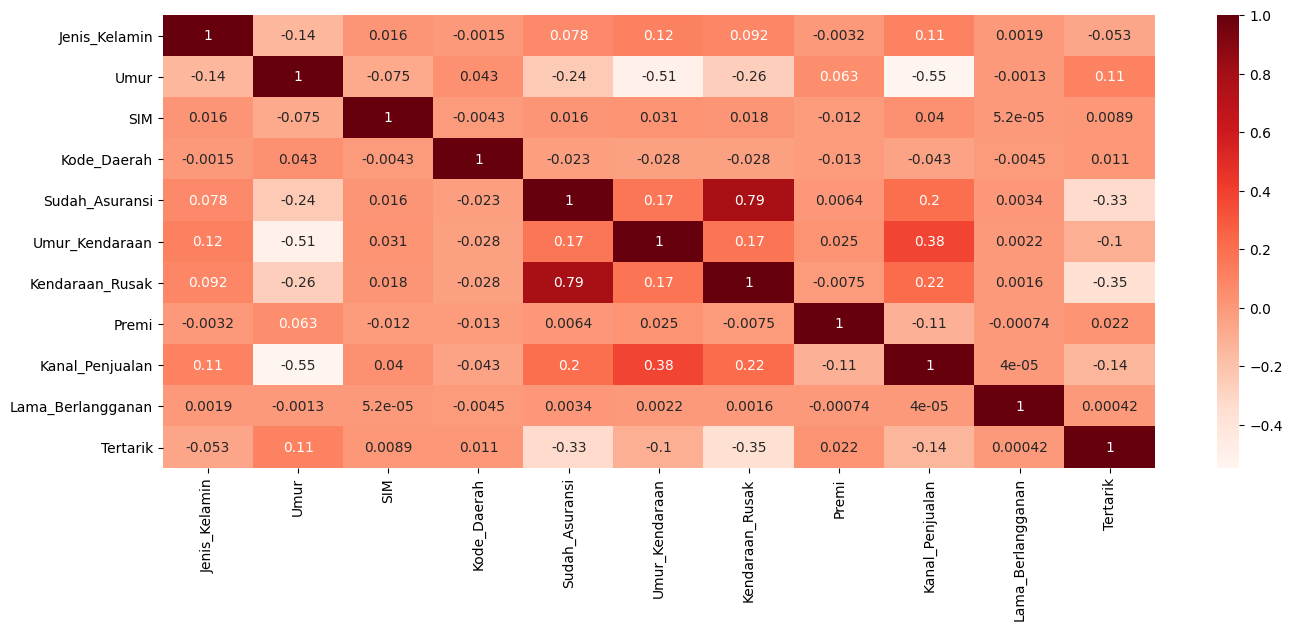

In [35]:
#menghitung hubungan antar kolom dan ditampilkan melalui heatmap
plt.figure(figsize=(16, 6))
# cor = data_eksperimen.corr()
sns.heatmap(core, annot=True, cmap=plt.cm.Reds)
plt.show()

In [36]:
#pemilihan fitur/kolom yang akan digunakan
data_eksperimen = data_eksperimen[['Kode_Daerah','Kanal_Penjualan']]

data_eksperimen.count()

Kode_Daerah        232345
Kanal_Penjualan    232345
dtype: int64

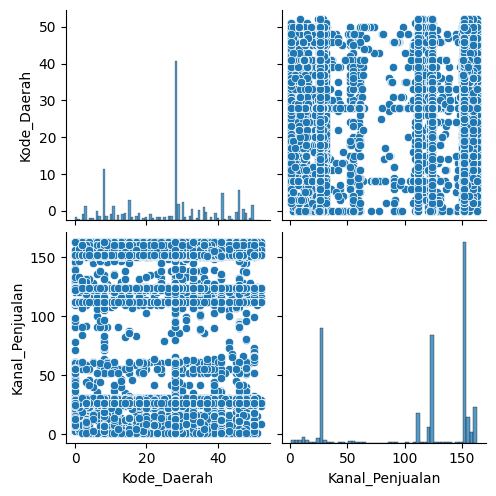

In [37]:
sns.pairplot(data_eksperimen)

In [38]:
#mengecek nilai kosong pada data yang akan digunakan
missing_data = data_eksperimen.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Kode_Daerah
False    232345
Name: Kode_Daerah, dtype: int64

Kanal_Penjualan
False    232345
Name: Kanal_Penjualan, dtype: int64



In [39]:
#menghapus data yang null/Nan untuk masing-masing kolom
data_eksperimen = data_eksperimen.dropna(axis=0)

In [40]:
#mereset index setelah penghapusan data
data_eksperimen.reset_index(drop=True, inplace=True)

data_eksperimen.count()

Kode_Daerah        232345
Kanal_Penjualan    232345
dtype: int64

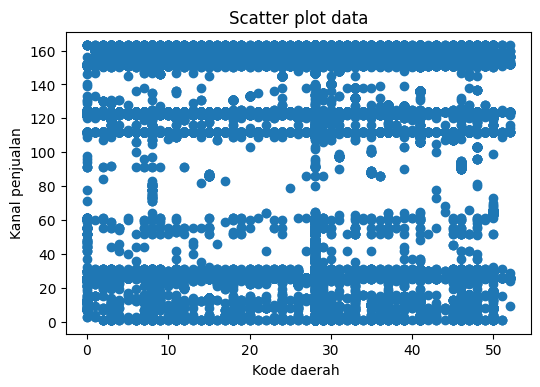

In [41]:
#pembuatan scatter plot untuk data eksperimen

x = data_eksperimen.iloc[:, 0].values
y = data_eksperimen.iloc[:, 1].values

plt.scatter(x, y)
plt.title('Scatter plot data')
plt.xlabel('Kode daerah ')
plt.ylabel('Kanal penjualan')
plt.show()

In [56]:
#mengubah data ke dalam bentuk array dua dimensi
data_2 = data_eksperimen.values
data_2
# Standardize the data to have a mean of ~0 and a variance of 1
sc_data_2 = StandardScaler()
data_2 = sc_data_2.fit_transform(data_eksperimen)
data_2

array([[ 0.49708566,  0.75451563],
       [ 0.94961884, -1.57663104],
       [ 1.62841862,  0.2238481 ],
       ...,
       [ 1.77926301,  0.75451563],
       [-1.46389146,  0.2238481 ],
       [ 0.11997468, -1.63348827]])

In [59]:
class KMeans2():
    #pembuatan object yang pertama kali
    def __init__(self,K=7):
        self.K = K
        self.clusters = {}
        self.centroids = []

    def predict2(self,D):
        
        self.clusters = {}
        jml_baris = D.shape[0]
        jml_kolom = D.shape[1]

        #memilih centroid secara acak dari data
        self.centroids = []
        for i in range(self.K):
            rand=rd.randint(0,jml_baris-1)
            self.centroids.append(D[rand])

        #proses clustering
        while True:
            #inisiasi cluster
            for i in range(self.K):
                self.clusters[i] = []

            #memasukkan data ke cluster terdekat
            for x in D:
                euc_dist = []
                for j in range(self.K):
                    euc_dist.append(calculate_distance(x, self.centroids[j]))
                self.clusters[euc_dist.index(min(euc_dist))].append(x)

            #menghitung rata-rata cluster dan memasukkan ke centroid baru
            avg_centroid = []
            for i in range(self.K):
                avg_centroid.append(avg_cluster(self.clusters[i], jml_kolom))

            #ubah posisi centroids
            centroids_tetap = True
            for i in range(self.K):
                if (round(np.sum(self.centroids[i]),2)-round(np.sum(avg_centroid[i]),2) != 0):
                    self.centroids[i] = avg_centroid[i]
                    centroids_tetap = False

            #cek kondisi centroids
            if centroids_tetap:
                break

        return self.clusters, self.centroids
        
    def sse_evaluation(self,D, K_eval):
        jml_kolom = D.shape[1]
        SSE_array = np.array([])
        SSE = 0
        global K
        for i in range(2,K_eval+1):
            #proses clustering dari untuk range tertentu
            self.K = i
            clusters, centroids = self.predict(D)
            #proses perhitungan sum square error
            jum = 0
            for j in range(self.K):
                for l in range(len(self.clusters[j])):
                    for m in range(jml_kolom):
                        jum = jum + (np.sum(centroids[j][m]-clusters[j][l][m])**2)

            #kode print(K) digunakan untuk mengetahui sudah sejauh mana proses evaluasi
            #print(K)
            print(jum)
            SSE_array=np.append(SSE_array,jum)

        return SSE_array
    
 

In [60]:
global K
K = KMeans2()
clusters,centroids = K.predict2(data_2)

In [61]:
# #print hasil sentroid dan sse
# print(sentroid)
# print(sse_result)
K_evaluation = 5
global K
K = KMeans()
y_evaluation = K.sse_evaluation(data_2,K_evaluation)
K_array = np.arange(2, K_evaluation+1)

419297.7279025192
293280.8687242726
265649.5682670627
246389.3477135639


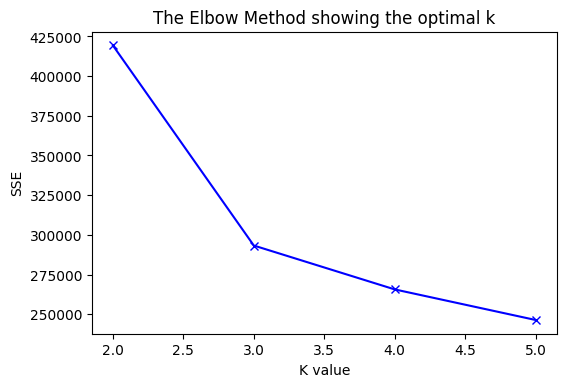

In [62]:
plt.rcParams['figure.dpi'] = 100
plt.plot(K_array,y_evaluation, 'bx-')
plt.xlabel('K value')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

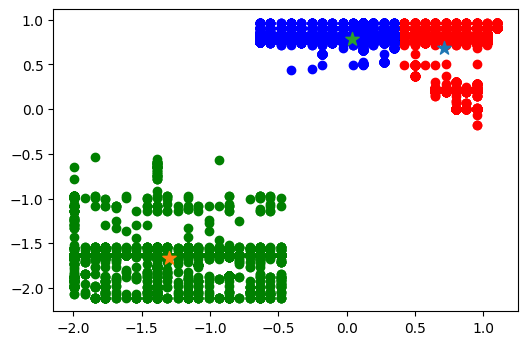

In [63]:
global centroids
global clusters 
global K
K = KMeans()
draw_scatter_plot(3)

In [64]:
#melakukan penyimpanan data eksplorasi
df.to_csv (r'C:\Users\komar\Downloads\dataekplorasi.csv', index = False, header=True)